# Analyzing Indicators of Adult Oral Health


## DATS 6103 Section 11 - Individual Project 3 - Jesse Liu

### 1. Project Introduction

Why is this project important?
-Oral health is an important indicator for cardiovascular disease and preventable for dental caries loss.


Data Source: The National Oral Health Surveillance System is part of the Centers for Disease Control and Prevention’s Division of Oral Health. The purpose of NOHSS is to monitor oral health and to track oral health indicators on a state and national level.

#### 2. Data Cleaning and Preprocessing

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display
pd.options.display.float_format = '{:,.10f}'.format

In [2]:
#Reading in data files
df = pd.read_csv("NOHSS_Adult_Indicators.csv")

#Citation of data sources: National Oral Health Surveillance System - CDC
from IPython.core.display import display, HTML
display(HTML("""<a href="https://chronicdata.cdc.gov/Oral-Health/NOHSS-Adult-Indicators/jz6n-v26y">Source: National Oral Health Surveillance System</a>"""))

from IPython.core.display import display, HTML
display(HTML("""<a href="https://healthdata.gov/dataset/nohss-child-indicators">Source: National Oral Health Surveillance System Indicators</a>"""))

In [3]:
#Cleaning dataset, selecting for columns of interest
cols = ["Year", "LocationDesc", "Indicator", "Response", "Data_Value_Type", "Data_Value", "Break_Out", "SampleSize" ]
df = df[cols]

#Renaming column names
df = df.rename(columns = {"LocationDesc": "State", "Data_Value": "Value", "Break_Out":"Category"})

#Adding a column to determine total number of indicator response based on response (%) and sample size 
df["Total Number"] = ((df["Value"]/100) * df["SampleSize"]) 

In [4]:
#Filtering for only Yes results to simplify dataframe, crude prevalence   
df = (df.loc[(df["Response"] == "Yes") & (df["Data_Value_Type"]== "Crude Prevalence")])

In [5]:
#Checkpoint
df1 = df.copy()

In [6]:
#Creating different datasets for different indicators
dfa = df1.loc[(df["Indicator"] == "Adults aged 18+ who have visited a dentist or dental clinic in the past year")]
dfb = df1.loc[(df["Indicator"] == "Adults aged 65+ who have lost all of their natural teeth due to tooth decay or gum disease")]
dfc = df1.loc[(df["Indicator"] == "Adults aged 65+ who have lost six or more teeth due to tooth decay or gum disease")]


In [7]:
dfb.head()

,Year,State,Indicator,Response,Data_Value_Type,Value,Category,SampleSize,Total Number
17,2016,United States,Adults aged 65+ who have lost all of their nat...,Yes,Crude Prevalence,13.8000000000,White,"18,075.0000000000","2,494.3500000000"
25,2012,Georgia,Adults aged 65+ who have lost all of their nat...,Yes,Crude Prevalence,11.5000000000,"$35,000-$49,999",24.0000000000,2.7600000000
70,2014,West Virginia,Adults aged 65+ who have lost all of their nat...,Yes,Crude Prevalence,35.8000000000,Female,399.0000000000,142.8420000000
124,2016,Louisiana,Adults aged 65+ who have lost all of their nat...,Yes,Crude Prevalence,nan,MultiRacial,nan,nan
133,2014,Nevada,Adults aged 65+ who have lost all of their nat...,Yes,Crude Prevalence,nan,"Less than $15,000",nan,nan


In [8]:
#Creating dataframes for the Elderly losing all teeth 
ctbdf = dfb.loc[(dfb["State"]=="Connecticut")]
mibdf = dfb.loc[(dfb["State"]=="Michigan")]
vabdf = dfb.loc[(dfb["State"]=="Virginia")]
msbdf = dfb.loc[(dfb["State"]=="Mississippi")]
wvbdf = dfb.loc[(dfb["State"]=="West Virginia")]
ctbdf1=ctbdf.pivot(index='Year', columns = "Category", values='Value') 
mibdf1=mibdf.pivot(index='Year', columns = "Category", values='Value') 
vabdf1=vabdf.pivot(index='Year', columns = "Category", values='Value') 
msbdf1=msbdf.pivot(index='Year', columns = "Category", values='Value') 
wvbdf1=wvbdf.pivot(index='Year', columns = "Category", values='Value')


In [9]:
#Creating dataframes for the Elderly teeth lost category
ctcdf = dfc.loc[(dfc["State"]=="Connecticut")]
micdf = dfc.loc[(dfc["State"]=="Michigan")]
vacdf = dfc.loc[(dfc["State"]=="Virginia")]
mscdf = dfc.loc[(dfc["State"]=="Mississippi")]
wvcdf = dfc.loc[(dfc["State"]=="West Virginia")]
ctcdf1=ctcdf.pivot(index='Year', columns = "Category", values='Value') 
micdf1=micdf.pivot(index='Year', columns = "Category", values='Value') 
vacdf1=vacdf.pivot(index='Year', columns = "Category", values='Value') 
mscdf1=mscdf.pivot(index='Year', columns = "Category", values='Value') 
wvcdf1=wvcdf.pivot(index='Year', columns = "Category", values='Value')

In [10]:
ctbdf1.head()

Category,NaN,"$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000+",Black,College graduate,Female,H.S. or G.E.D.,Hispanic,"Less than $15,000",Less than H.S.,Male,MultiRacial,Other,Some post H.S.,White
Year,,,,,,,,,,,,,,,,,
2012,13.6000000000,24.4000000000,15.8000000000,10.6000000000,4.4000000000,24.0000000000,4.0000000000,13.8000000000,14.2000000000,30.7000000000,23.4000000000,32.4000000000,13.4000000000,nan,nan,12.0000000000,11.8000000000
2014,10.5000000000,15.6000000000,12.5000000000,11.6000000000,4.0000000000,17.9000000000,2.8000000000,11.6000000000,14.7000000000,nan,28.4000000000,23.5000000000,9.0000000000,nan,nan,8.2000000000,9.7000000000
2016,9.6000000000,16.4000000000,14.0000000000,10.2000000000,4.1000000000,13.3000000000,2.6000000000,9.3000000000,12.2000000000,16.4000000000,19.4000000000,21.0000000000,10.0000000000,nan,nan,8.4000000000,8.7000000000
2018,9.0000000000,16.1000000000,12.4000000000,8.3000000000,3.0000000000,23.0000000000,2.7000000000,9.7000000000,11.1000000000,nan,28.4000000000,23.5000000000,8.2000000000,nan,nan,6.9000000000,7.9000000000


In [11]:
#Creating new dataframes to look at the top 10 states with highest percentage of indicators
dfa1 = dfa.sort_values("Value",ascending = False).head(10)
dfb1 = dfb.sort_values("Value",ascending = False).head(10)
dfc1 = dfc.sort_values("Value",ascending = False).head(10)

10 states were chosen to be analyzed. The top five states with the highest and lowest percentage of adults (18+) who visited a dentist or dental clinic in the past one year were chosen to be analyzed.  

The top five states: Connecticut, Delaware, Rhode Island, Michigan, Virginia  
The bottom five states: New Hampshire, Tennessee, Arkansas, Mississippi, West Virginia

In [12]:
#Creating selected datasets for each individual state
ctdf = dfa.loc[(dfa["State"]=="Connecticut")]
midf = dfa.loc[(dfa["State"]=="Michigan")]
vadf = dfa.loc[(dfa["State"]=="Virginia")]
msdf = dfa.loc[(dfa["State"]=="Mississippi")]
wvdf = dfa.loc[(dfa["State"]=="West Virginia")]

In [13]:
#Reformatting Dataframes for timeseries plots using pivot function
ctdf1=ctdf.pivot(index='Year', columns = "Category", values='Value') 
midf1=midf.pivot(index='Year', columns = "Category", values='Value') 
vadf1=vadf.pivot(index='Year', columns = "Category", values='Value') 
msdf1=msdf.pivot(index='Year', columns = "Category", values='Value') 
wvdf1=wvdf.pivot(index='Year', columns = "Category", values='Value') 

In [22]:
vadf1.head()

Category,NaN,"$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000+",18-24,25-34,35-44,45-54,55-64,...,Female,H.S. or G.E.D.,Hispanic,"Less than $15,000",Less than H.S.,Male,MultiRacial,Other,Some post H.S.,White
Year,,,,,,,,,,,,,,,,,,,,,
2012,70.4000000000,53.0000000000,65.5000000000,68.5000000000,83.0000000000,72.3000000000,67.9000000000,70.7000000000,69.8000000000,73.1000000000,...,73.8000000000,63.6000000000,61.1000000000,46.5000000000,43.8000000000,66.8000000000,59.2000000000,68.2000000000,73.6000000000,73.2000000000
2014,69.3000000000,52.2000000000,63.1000000000,64.3000000000,82.3000000000,68.8000000000,65.6000000000,67.5000000000,71.0000000000,72.3000000000,...,71.0000000000,62.5000000000,61.8000000000,42.4000000000,44.0000000000,67.5000000000,62.5000000000,65.3000000000,70.9000000000,72.5000000000
2016,70.5000000000,53.2000000000,58.8000000000,69.8000000000,81.9000000000,67.7000000000,65.2000000000,73.6000000000,74.1000000000,71.6000000000,...,72.4000000000,64.1000000000,57.1000000000,45.1000000000,46.4000000000,68.5000000000,60.5000000000,71.3000000000,71.6000000000,73.7000000000
2018,71.7000000000,52.4000000000,59.3000000000,69.2000000000,82.6000000000,74.3000000000,62.4000000000,73.1000000000,73.1000000000,74.6000000000,...,74.6000000000,65.6000000000,62.4000000000,43.4000000000,45.9000000000,68.6000000000,65.5000000000,77.7000000000,72.2000000000,74.1000000000


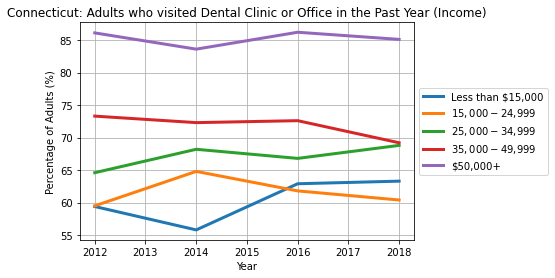

In [15]:
#Plotting Connecticut 
ctdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Connecticut: Adults who visited Dental Clinic or Office in the Past Year (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Note: The percentage of adults with income 35,000-49,999 decreases over time and adults with income 25,000-34,999 
#becomes almost equal

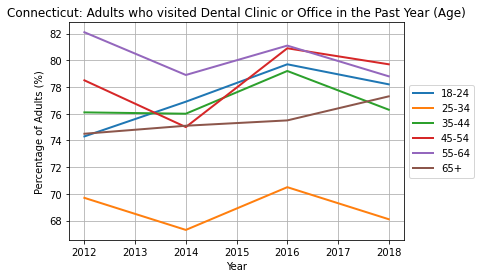

In [16]:
#Plotting Connecticut 
ctdf1.plot.line(y=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"] ,linewidth=2)
plt.title("Connecticut: Adults who visited Dental Clinic or Office in the Past Year (Age)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


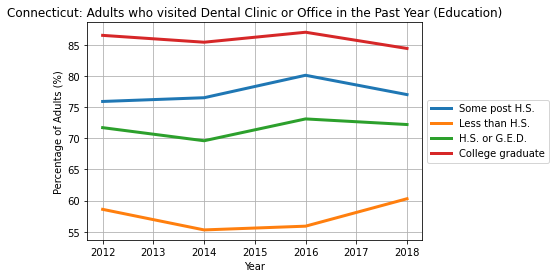

In [17]:
#Plotting Connecticut 
ctdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Connecticut: Adults who visited Dental Clinic or Office in the Past Year (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Note: 

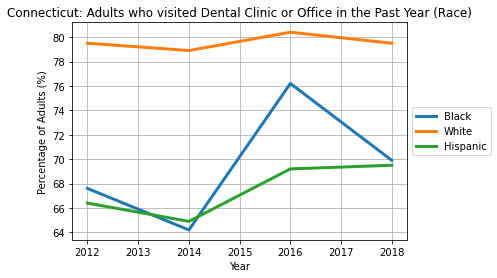

In [18]:
#Plotting Connecticut 
ctdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Connecticut: Adults who visited Dental Clinic or Office in the Past Year (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


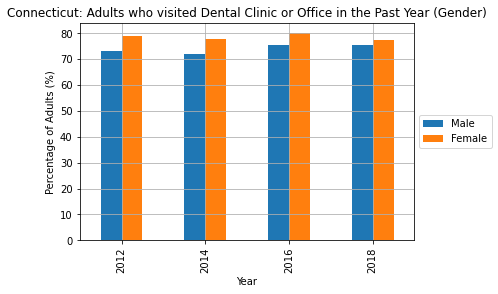

In [19]:
#Plotting Connecticut 
ctdf1.plot.bar(y=["Male", "Female"])
plt.title("Connecticut: Adults who visited Dental Clinic or Office in the Past Year (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


#Note: The percentage of adults with income 35,000-49,999 decreases over time and adults with income 25,000-34,999 
#becomes almost equal

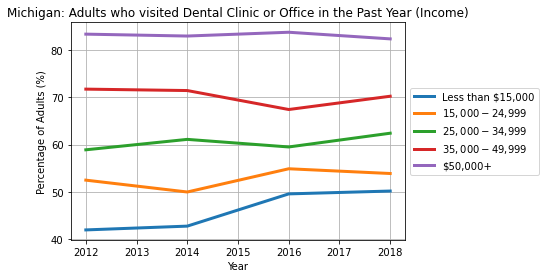

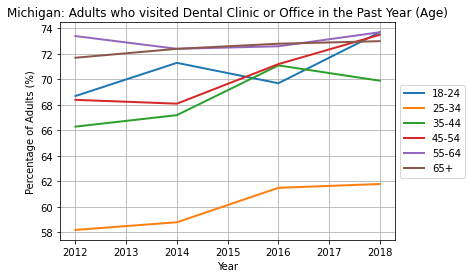

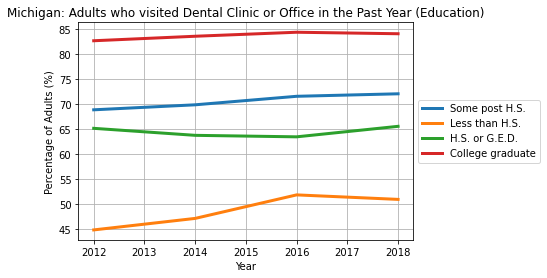

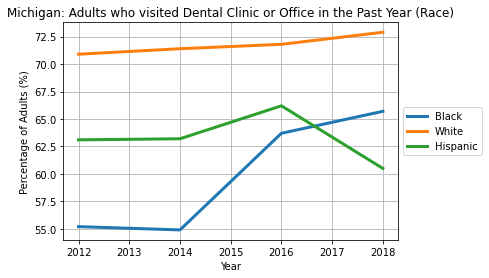

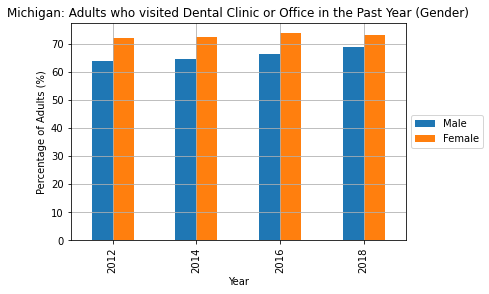

In [20]:
#Plotting Michigan dental visits (income)
midf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Michigan: Adults who visited Dental Clinic or Office in the Past Year (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan dental visits (age)
midf1.plot.line(y=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"] ,linewidth=2)
plt.title("Michigan: Adults who visited Dental Clinic or Office in the Past Year (Age)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan dental visits (education)
midf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Michigan: Adults who visited Dental Clinic or Office in the Past Year (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan dental visits (race)
midf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Michigan: Adults who visited Dental Clinic or Office in the Past Year (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan dental visits (Gender)
midf1.plot.bar(y=["Male", "Female"])
plt.title("Michigan: Adults who visited Dental Clinic or Office in the Past Year (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


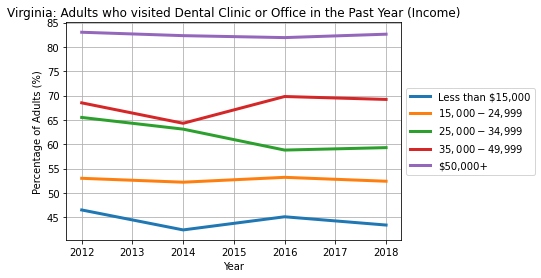

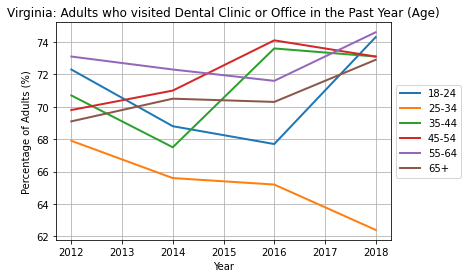

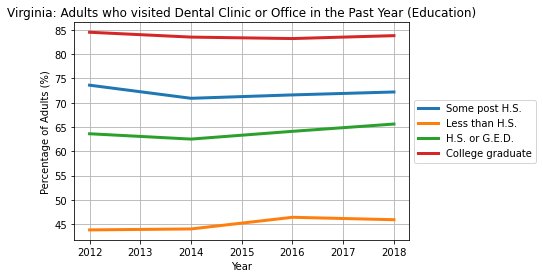

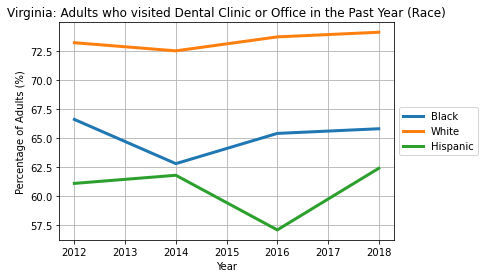

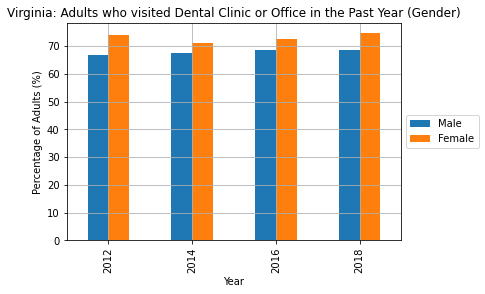

In [23]:
#Plotting Virginia dental visits (income)
vadf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Virginia: Adults who visited Dental Clinic or Office in the Past Year (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia dental visits (age)
vadf1.plot.line(y=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"] ,linewidth=2)
plt.title("Virginia: Adults who visited Dental Clinic or Office in the Past Year (Age)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia dental visits (education)
vadf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Virginia: Adults who visited Dental Clinic or Office in the Past Year (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia dental visits (race)
vadf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Virginia: Adults who visited Dental Clinic or Office in the Past Year (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia dental visits (Gender)
vadf1.plot.bar(y=["Male", "Female"])
plt.title("Virginia: Adults who visited Dental Clinic or Office in the Past Year (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


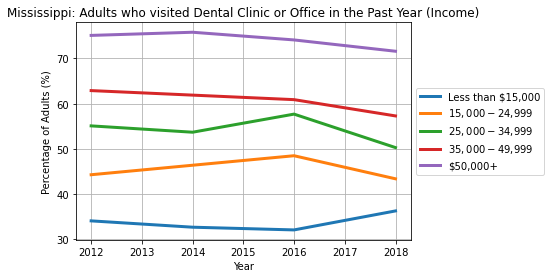

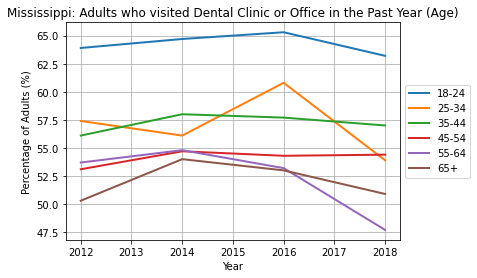

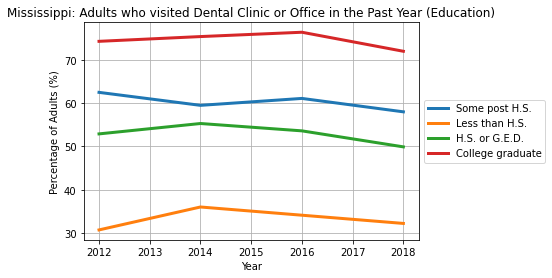

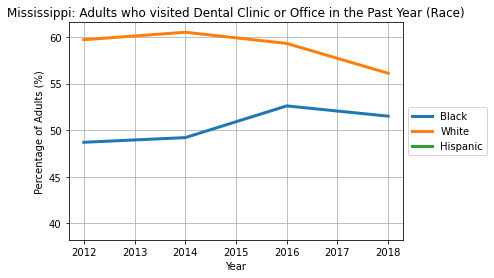

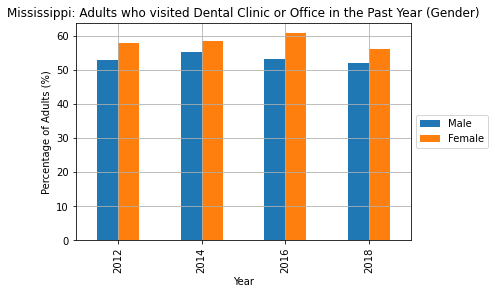

In [24]:
#Plotting Mississippi dental visits (income)
msdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Mississippi: Adults who visited Dental Clinic or Office in the Past Year (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi dental visits (age)
msdf1.plot.line(y=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"] ,linewidth=2)
plt.title("Mississippi: Adults who visited Dental Clinic or Office in the Past Year (Age)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi dental visits (education)
msdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Mississippi: Adults who visited Dental Clinic or Office in the Past Year (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi dental visits (race)
msdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Mississippi: Adults who visited Dental Clinic or Office in the Past Year (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi dental visits (Gender)
msdf1.plot.bar(y=["Male", "Female"])
plt.title("Mississippi: Adults who visited Dental Clinic or Office in the Past Year (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


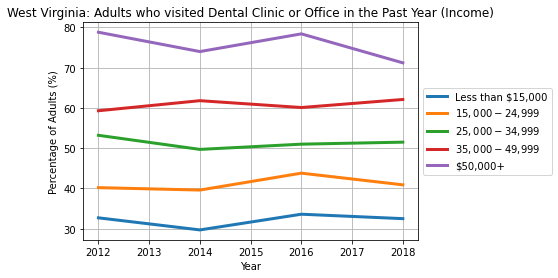

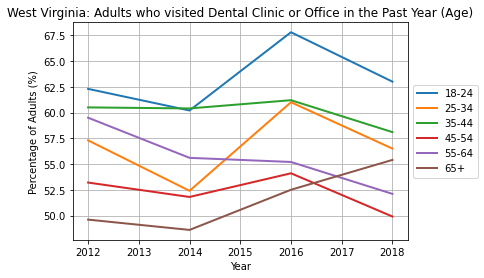

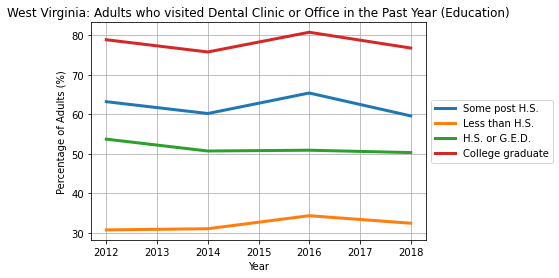

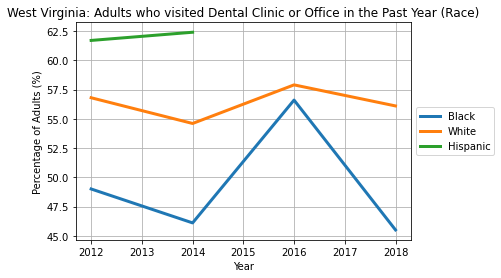

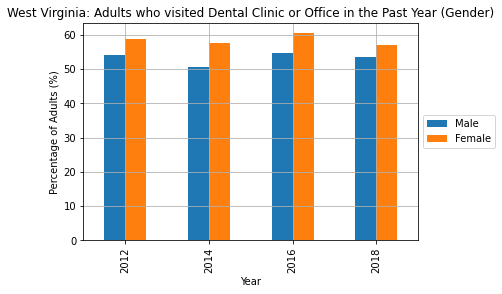

In [25]:
#Plotting West Virginia dental visits (income)
wvdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("West Virginia: Adults who visited Dental Clinic or Office in the Past Year (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia dental visits (age)
wvdf1.plot.line(y=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"] ,linewidth=2)
plt.title("West Virginia: Adults who visited Dental Clinic or Office in the Past Year (Age)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia dental visits (education)
wvdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("West Virginia: Adults who visited Dental Clinic or Office in the Past Year (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia dental visits (race)
wvdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("West Virginia: Adults who visited Dental Clinic or Office in the Past Year (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia dental visits (Gender)
wvdf1.plot.bar(y=["Male", "Female"])
plt.title("West Virginia: Adults who visited Dental Clinic or Office in the Past Year (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

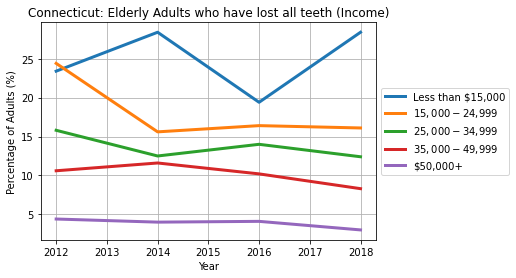

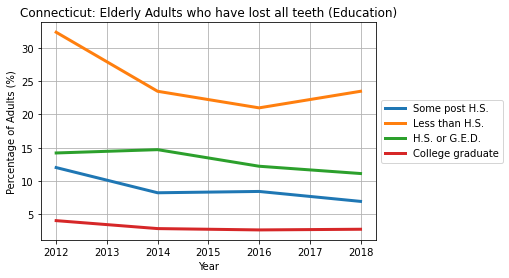

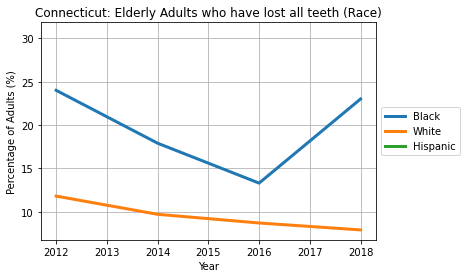

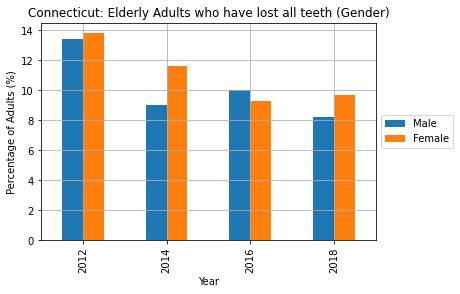

In [39]:
#Plotting Connecticut Elderly teeth who have lost all teeth (income)
ctbdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Connecticut: Elderly Adults who have lost all teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Connecticut Elderly teeth who have lost all teeth (education)
ctbdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Connecticut: Elderly Adults who have lost all teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Connecticut Elderly teeth who have lost all teeth (race)
ctbdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Connecticut: Elderly Adults who have lost all teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Connecticut Elderly teeth who have lost all teeth (Gender)
ctbdf1.plot.bar(y=["Male", "Female"])
plt.title("Connecticut: Elderly Adults who have lost all teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


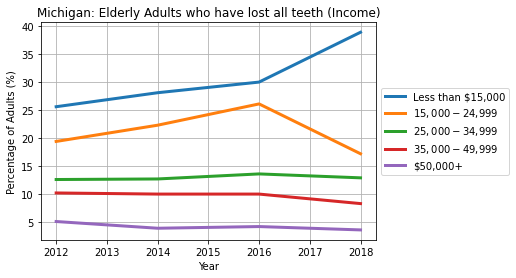

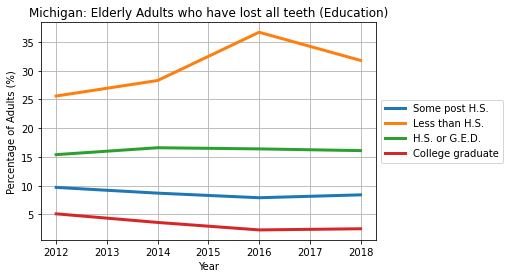

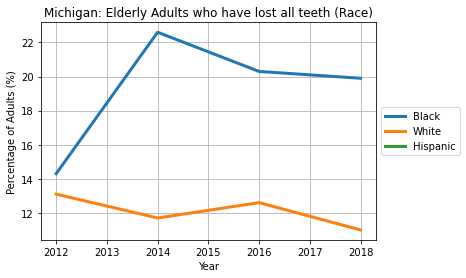

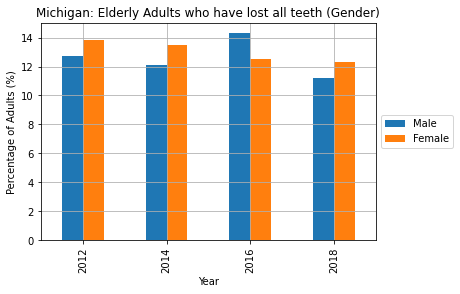

In [40]:
#Plotting Michigan Elderly teeth who have lost all teeth (Income)
mibdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Michigan: Elderly Adults who have lost all teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan Elderly teeth who have lost all teeth (Education)
mibdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Michigan: Elderly Adults who have lost all teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan Elderly teeth who have lost all teeth (Race)
mibdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Michigan: Elderly Adults who have lost all teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan Elderly teeth who have lost all teeth (Gender)
mibdf1.plot.bar(y=["Male", "Female"])
plt.title("Michigan: Elderly Adults who have lost all teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


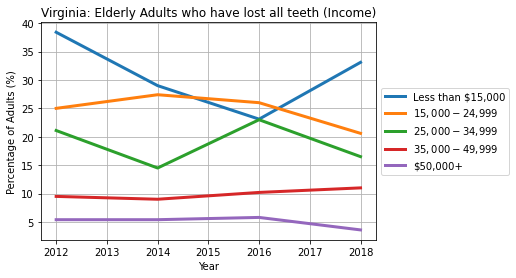

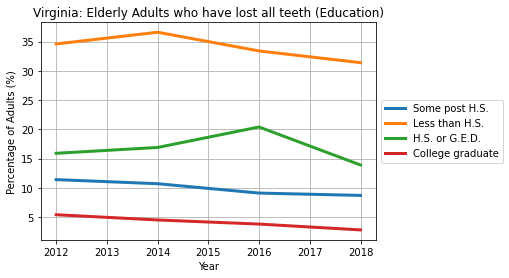

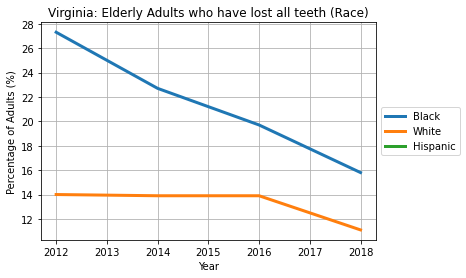

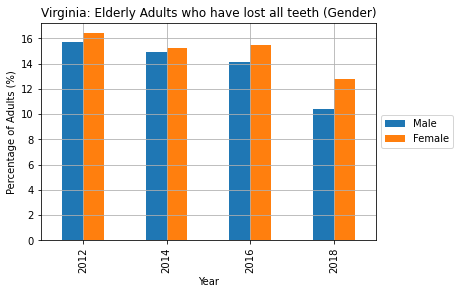

In [30]:
#Plotting Virginia Elderly teeth who have lost all teeth (Income)
vabdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Virginia: Elderly Adults who have lost all teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia Elderly teeth who have lost all teeth (Education)
vabdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Virginia: Elderly Adults who have lost all teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia Elderly teeth who have lost all teeth (Race)
vabdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Virginia: Elderly Adults who have lost all teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia Elderly teeth who have lost all teeth (Gender)
vabdf1.plot.bar(y=["Male", "Female"])
plt.title("Virginia: Elderly Adults who have lost all teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)


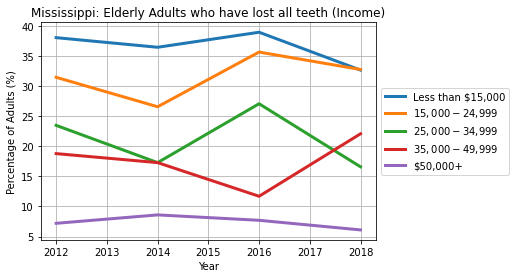

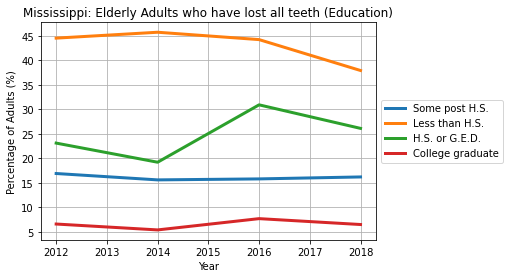

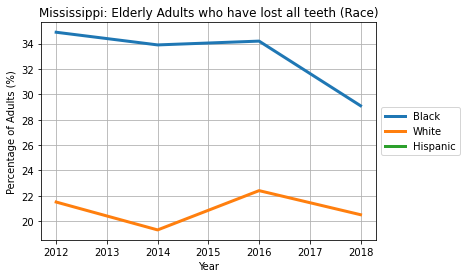

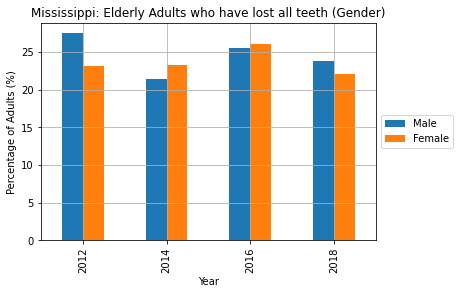

In [32]:
#Plotting Mississippi Elderly teeth who have lost all teeth (Income)
msbdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Mississippi: Elderly Adults who have lost all teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi Elderly teeth who have lost all teeth (Education)
msbdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Mississippi: Elderly Adults who have lost all teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi Elderly teeth who have lost all teeth (Race)
msbdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Mississippi: Elderly Adults who have lost all teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi Elderly teeth who have lost all teeth (Gender)
msbdf1.plot.bar(y=["Male", "Female"])
plt.title("Mississippi: Elderly Adults who have lost all teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

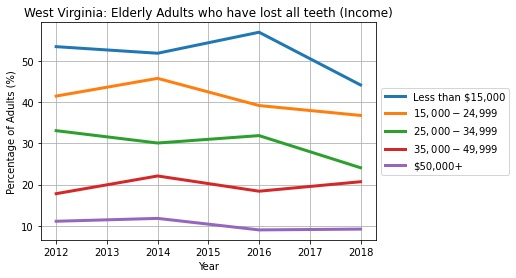

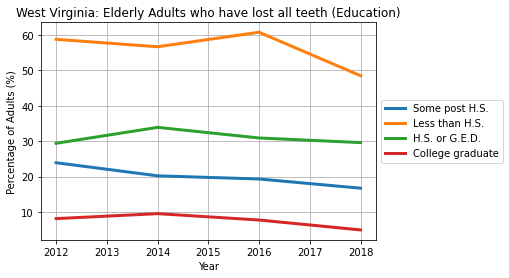

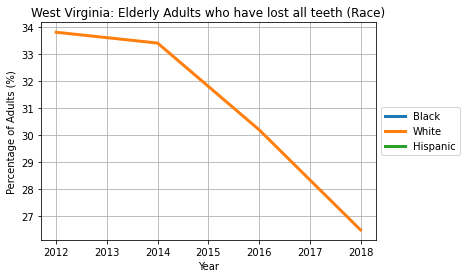

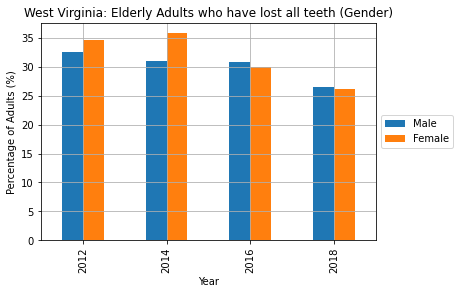

In [33]:
#Plotting West Virginia Elderly teeth who have lost all teeth (Income)
wvbdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("West Virginia: Elderly Adults who have lost all teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia Elderly teeth who have lost all teeth (Education)
wvbdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("West Virginia: Elderly Adults who have lost all teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia Elderly teeth who have lost all teeth (Race)
wvbdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("West Virginia: Elderly Adults who have lost all teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia Elderly teeth who have lost all teeth (Gender)
wvbdf1.plot.bar(y=["Male", "Female"])
plt.title("West Virginia: Elderly Adults who have lost all teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

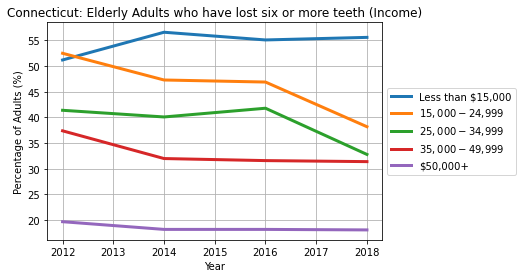

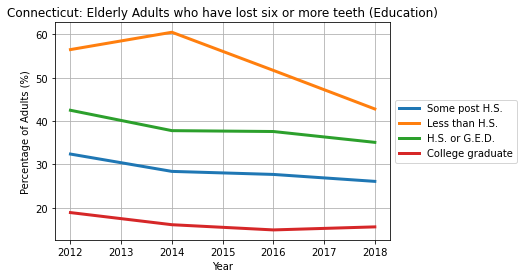

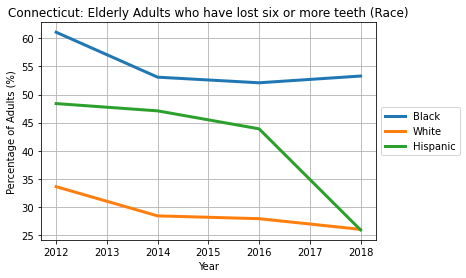

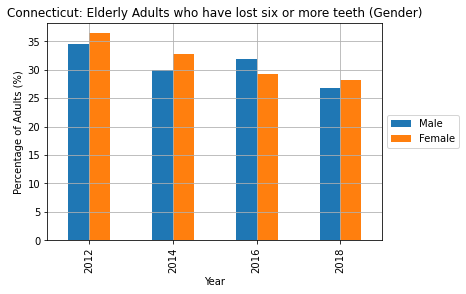

In [34]:
#Plotting Connecticut Elderly who have lost six or more teeth (Income)
ctcdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Connecticut: Elderly Adults who have lost six or more teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Connecticut Elderly who have lost six or more teeth (Education)
ctcdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Connecticut: Elderly Adults who have lost six or more teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Connecticut Elderly who have lost six or more teeth (Race)
ctcdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Connecticut: Elderly Adults who have lost six or more teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Connecticut Elderly who have lost six or more teeth (Gender)
ctcdf1.plot.bar(y=["Male", "Female"])
plt.title("Connecticut: Elderly Adults who have lost six or more teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

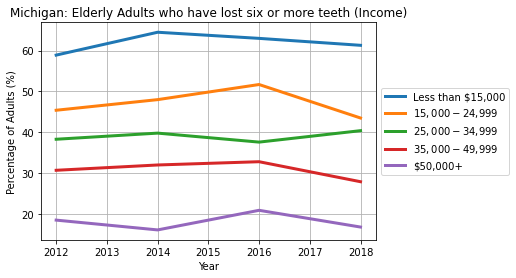

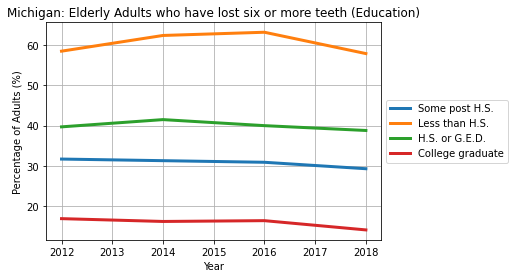

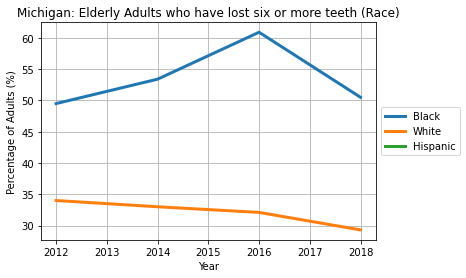

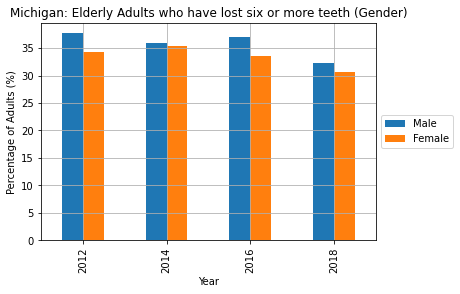

In [35]:
#Plotting Michigan Elderly who have lost six or more teeth (Income)
micdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Michigan: Elderly Adults who have lost six or more teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan Elderly who have lost six or more teeth (Education)
micdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Michigan: Elderly Adults who have lost six or more teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan Elderly who have lost six or more teeth (Race)
micdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Michigan: Elderly Adults who have lost six or more teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Michigan Elderly who have lost six or more teeth (Gender)
micdf1.plot.bar(y=["Male", "Female"])
plt.title("Michigan: Elderly Adults who have lost six or more teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

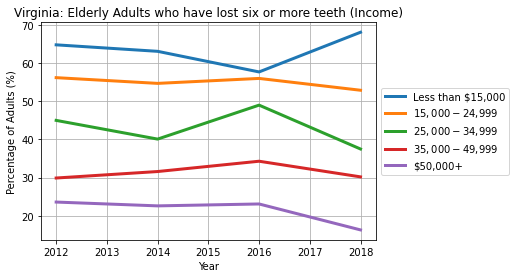

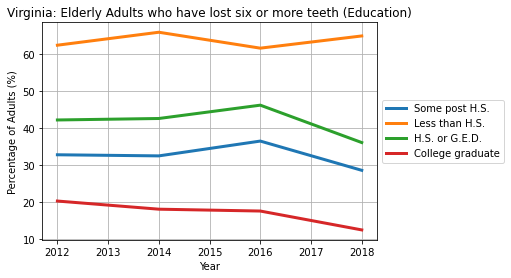

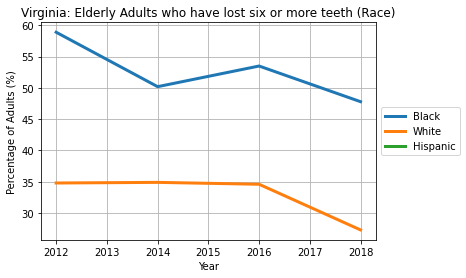

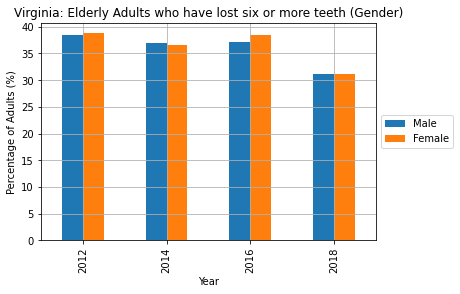

In [36]:
#Plotting Virginia Elderly who have lost six or more teeth (Income)
vacdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Virginia: Elderly Adults who have lost six or more teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia Elderly who have lost six or more teeth (Education)
vacdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Virginia: Elderly Adults who have lost six or more teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia Elderly who have lost six or more teeth (Race)
vacdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Virginia: Elderly Adults who have lost six or more teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Virginia Elderly who have lost six or more teeth (Gender)
vacdf1.plot.bar(y=["Male", "Female"])
plt.title("Virginia: Elderly Adults who have lost six or more teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

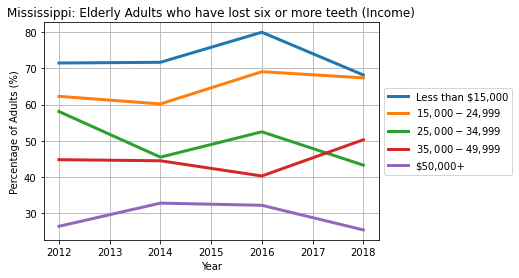

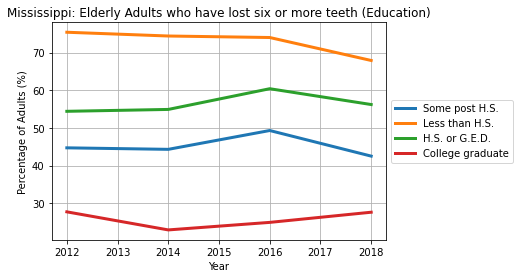

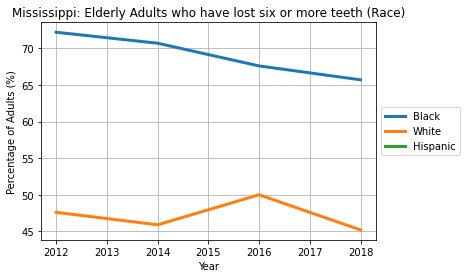

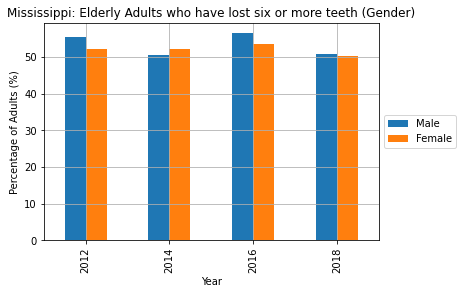

In [37]:
#Plotting Mississippi Elderly who have lost six or more teeth (Income)
mscdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("Mississippi: Elderly Adults who have lost six or more teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi Elderly who have lost six or more teeth (Education)
mscdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("Mississippi: Elderly Adults who have lost six or more teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi Elderly who have lost six or more teeth (Race)
mscdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("Mississippi: Elderly Adults who have lost six or more teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting Mississippi Elderly who have lost six or more teeth (Gender)
mscdf1.plot.bar(y=["Male", "Female"])
plt.title("Mississippi: Elderly Adults who have lost six or more teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

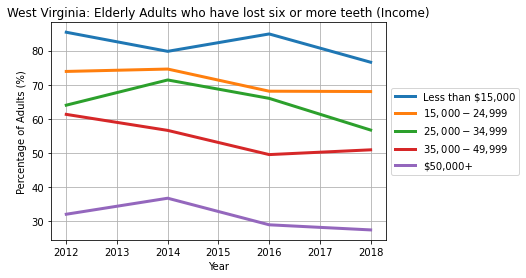

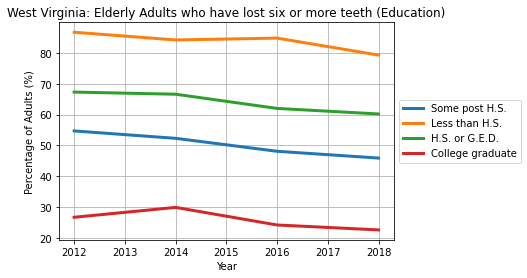

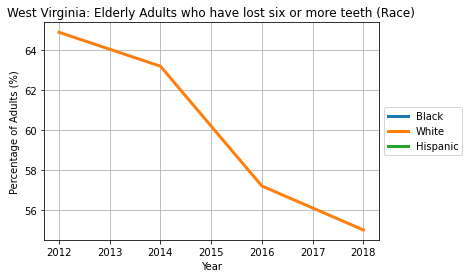

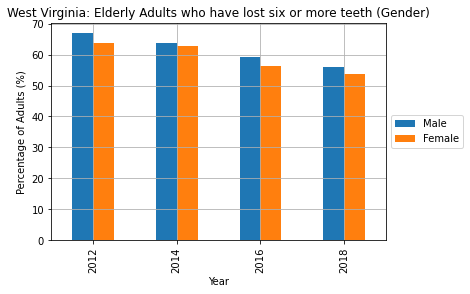

In [38]:
#Plotting West Virginia Elderly who have lost six or more teeth (Income)
wvcdf1.plot.line(y=["Less than $15,000", "$15,000-$24,999", "$25,000-$34,999", "$35,000-$49,999", "$50,000+"],linewidth=3)
plt.title("West Virginia: Elderly Adults who have lost six or more teeth (Income)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia Elderly who have lost six or more teeth (Education)
wvcdf1.plot.line(y=["Some post H.S.", "Less than H.S.", "H.S. or G.E.D.", "College graduate"],linewidth=3)
plt.title("West Virginia: Elderly Adults who have lost six or more teeth (Education)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia Elderly who have lost six or more teeth (Race)
wvcdf1.plot.line(y=["Black", "White", "Hispanic"],linewidth=3)
plt.title("West Virginia: Elderly Adults who have lost six or more teeth (Race)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

#Plotting West Virginia Elderly who have lost six or more teeth (Gender)
wvcdf1.plot.bar(y=["Male", "Female"])
plt.title("West Virginia: Elderly Adults who have lost six or more teeth (Gender)")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

External Links:

GitHub Repository: https://github.com/jesse-cloud/DATS-6103---Individual-Project-3---Jesse-Liu

Zenodo link: https://zenodo.org/record/4312008

GitHub io: https://jesse-cloud.github.io